In [50]:
import pandas as pd
df = pd.read_csv('flights.csv', low_memory=False)
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

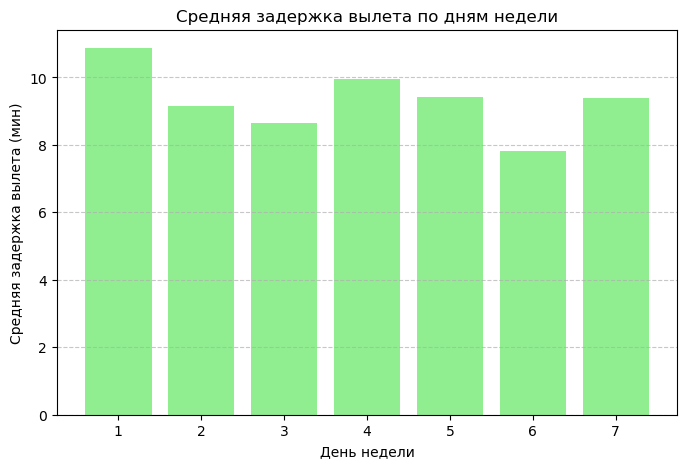

In [12]:
import matplotlib.pyplot as plt
mean_delay_by_day = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().reset_index()


plt.figure(figsize=(8, 5))
plt.bar(mean_delay_by_day['DAY_OF_WEEK'], mean_delay_by_day['DEPARTURE_DELAY'], color='lightgreen')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка вылета (мин)')
plt.title('Средняя задержка вылета по дням недели')
plt.xticks(mean_delay_by_day['DAY_OF_WEEK'])


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Задержка рейсов по дням недели отличается несильно, посмотрим, связано ли это с количеством рейсов

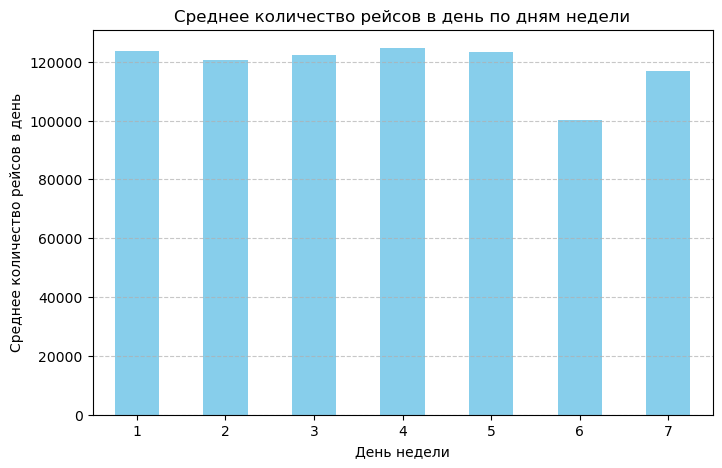

In [25]:
mean_flights_by_day = df.groupby('DAY_OF_WEEK')['FLIGHT_NUMBER'].count() / df.groupby('DAY_OF_WEEK').ngroups


plt.figure(figsize=(8, 5))
mean_flights_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('День недели')
plt.ylabel('Среднее количество рейсов в день')
plt.title('Среднее количество рейсов в день по дням недели')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
Наибольшее время задержек в восресенье - видимо нароД не любит работать в выходной.
В целом время задержек зависит от количества рейсов: больше рейсов - выше задержка
Посмотрим также на среднее число задержек

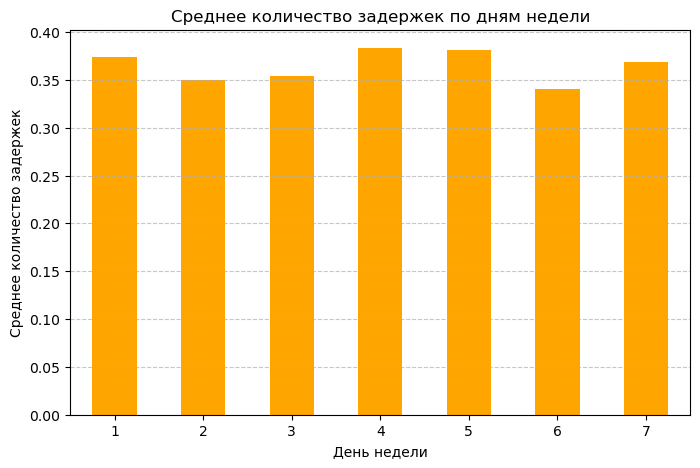

In [44]:
total_delays_by_day = df[df['DEPARTURE_DELAY'] > 0].groupby('DAY_OF_WEEK').size()

#подсчет дней недели
day_counts = df.groupby('DAY_OF_WEEK').size()

# Вычисление среднего числа задержек по дням недели
mean_delay_counts_by_day = total_delays_by_day / day_counts


plt.figure(figsize=(8, 5))
mean_delay_counts_by_day.plot(kind='bar', color='orange')
plt.xlabel('День недели')
plt.ylabel('Среднее количество задержек')
plt.title('Среднее количество задержек по дням недели')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Как видно из диаграмм, количество задержек напрямую (корреляция 1) зависит от количества рейсов

Вывод: для уменьшения количества задержек, нужно равномерно распределить количество рейсов

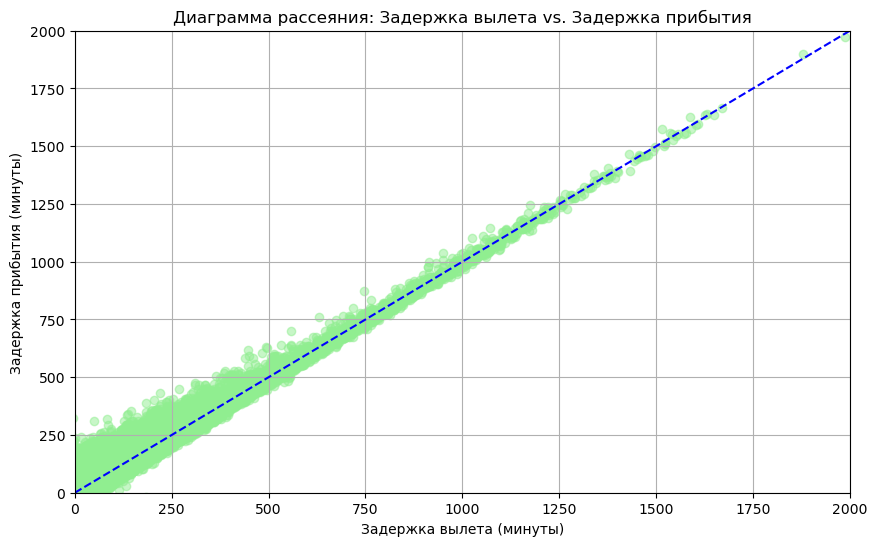

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DEPARTURE_DELAY'], df['ARRIVAL_DELAY'], color='lightgreen', alpha=0.5)
plt.plot([0, 2000], [0, 2000], linestyle='--', color='blue')
plt.xlabel('Задержка вылета (минуты)')
plt.ylabel('Задержка прибытия (минуты)')
plt.title('Диаграмма рассеяния: Задержка вылета vs. Задержка прибытия')
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.grid(True)

plt.show()

In [ ]:
Вывод: задержка прибытия не всегда влечет за собой задержку вылета. Однако при длительных опозданиях прибытия/вылета 
вылет/прибытие задерживаются


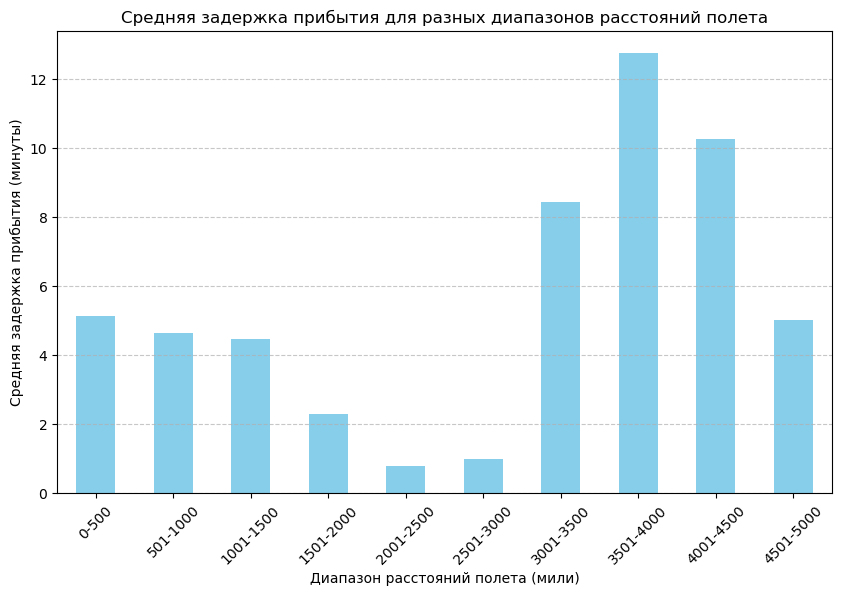

In [73]:
distance_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
distance_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']

# Добавление столбца с категориями диапазонов расстояний полета
df['DISTANCE_CATEGORY'] = pd.cut(df['DISTANCE'], bins=distance_bins, labels=distance_labels)

# Вычисление средней задержки прибытия для каждой категории
mean_arrival_delay_by_distance = df.groupby('DISTANCE_CATEGORY')['ARRIVAL_DELAY'].mean()


plt.figure(figsize=(8, 6))
mean_arrival_delay_by_distance.plot(kind='bar', color='skyblue')
plt.xlabel('Диапазон расстояний полета (мили)')
plt.ylabel('Средняя задержка прибытия (минуты)')
plt.title('Средняя задержка прибытия для разных диапазонов расстояний полета')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Очень неоднозначное распределение опозданий. Скорее всего, это связано с наилучшими погодными условиями или оптимальным планированием конкретных маршрутов.